## От чего зависит CTR email рассылок?

Email-marketing - один из частоиспользуемых и эффективных инструментов маркетинга в онлайне. Его используют многие компании и организации.  
Email кампании содержат различные типы CTA (призыв к действию). Конечная цель кампаний по электронной почте — максимизировать рейтинг кликов (CTR).  
CTR = количество пользователей, которые нажали хотя бы на один из призывов к действию / количество доставленных писем.  

CTR зависит от множества факторов, таких как дизайн, контент, персонализация и т. д.  
В нашем исследовании мы поставим комплексный вопрос: "от чего зависит эффективность CTR?"   

Для этого ответим на исследовательские вопросы:  
* Когда отправляют больше всего писем?
* Когда отправляют больше всего писем с высоким CTR?  
* Влияет ли средняя длина призыва к действию на CTR?
* Каких писем больше: с высоким CTR или низким?  
* Влияет ли день отправки на CTR? 

## Подготавливаем данные к анализу

In [50]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats
import statsmodels.api as sm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
#Работаем с нужными библиотеками для анализа и визуализации данных

In [51]:
df_ctr = pd.read_csv('train_Data.csv', sep=',') #подгружаем датасет

## Рассмотрим данные поближе

In [52]:
df_ctr #рассмотрим, какие колонки есть в датасете

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


Видим 1888 строки и 22 колонки

**Чтобы понять, о каких данных идет речь в колонках, опишу их.**   
subject_len - длина названия.     
body_len - длина тела письма.   
day_of_week - день недели, где 0 - понедельник, 6 - воскресенье.   
is_weekend  - выходной ли это: 0 - нет, 1 - да.   
times_of_day - время суток.   
mean_CTA_len - длина призыва к действию.   
is_image - есть ли картинка: 0 - нет, 1 - да.   
is_personalised - есть ли персонализация:0 - нет, 1 - да  
is_timer - есть ли таймер: 0 - нет, 1 - да   
s_emoticons - есть ли эмодзи: 0 - нет, 1 - да    
is_discount - есть ли скидки: 0 - нет, 1 - да  
is_price - есть ли цена: 0 - нет, 1 - да   
is_urgency - есть ли триггер срочности: 0 - нет, 1 - да   
**click_rate - рейтинг кликов, наша целевая переменная**

In [53]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [54]:
df_ctr.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

Видим, что нет пропусков и данные подходят для анализа

## Визуализация данных

Для начала проанализируем временные переменные и как они соотносятся между собой

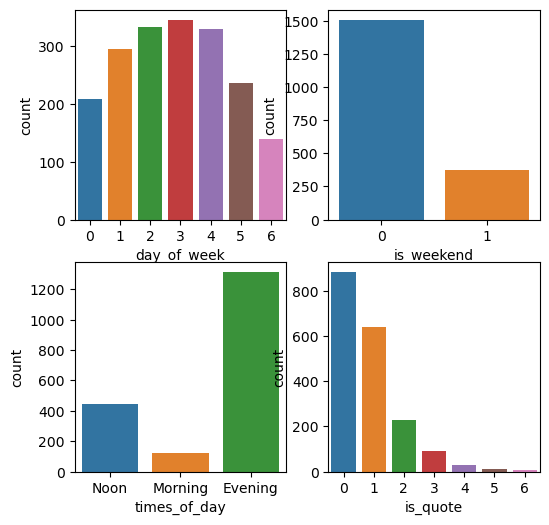

In [55]:
cat_cols = ['day_of_week','is_weekend','times_of_day', 'is_quote']

_, ax1 = plt.subplots(2,2, figsize=(6,6))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_ctr, ax=ax1[i//2, i%2])
    
plt.show()

Что мы видим на графиках?  
Большинство писем отправляют в четверг, среду и пятницу.  
Большинство писем отправляют не в выходные.   
Большинство писем отправляют вечером  

In [56]:
day_ctr_sorted = df_ctr.loc[:, ['times_of_day', 'click_rate']].sort_values('click_rate', ascending=False)
day_ctr_sorted[:10]
#для начала сортируем время суток по CTR

,times_of_day,click_rate
791,Noon,0.897959
1,Morning,0.700000
263,Morning,0.692521
651,Evening,0.692308
1002,Noon,0.666667
1256,Noon,0.666667
1237,Noon,0.633333
792,Noon,0.612466
1766,Evening,0.600683
341,Evening,0.526316


In [57]:
df = day_ctr_sorted[:10]

<AxesSubplot:xlabel='click_rate', ylabel='times_of_day'>

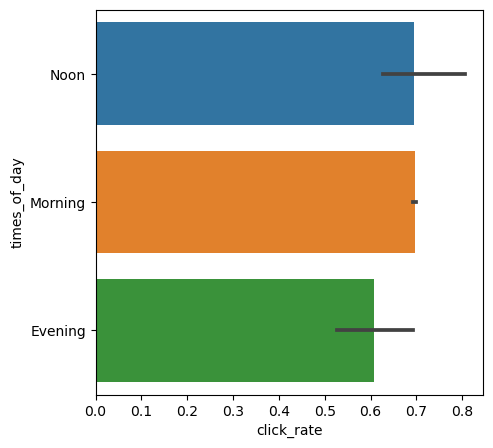

In [58]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['click_rate'],y = df['times_of_day']) 

Заметим, что CTR выше, когда письмо отправляют днем или утром

Теперь посмотрим на переменные, которые связаны с длиной символов

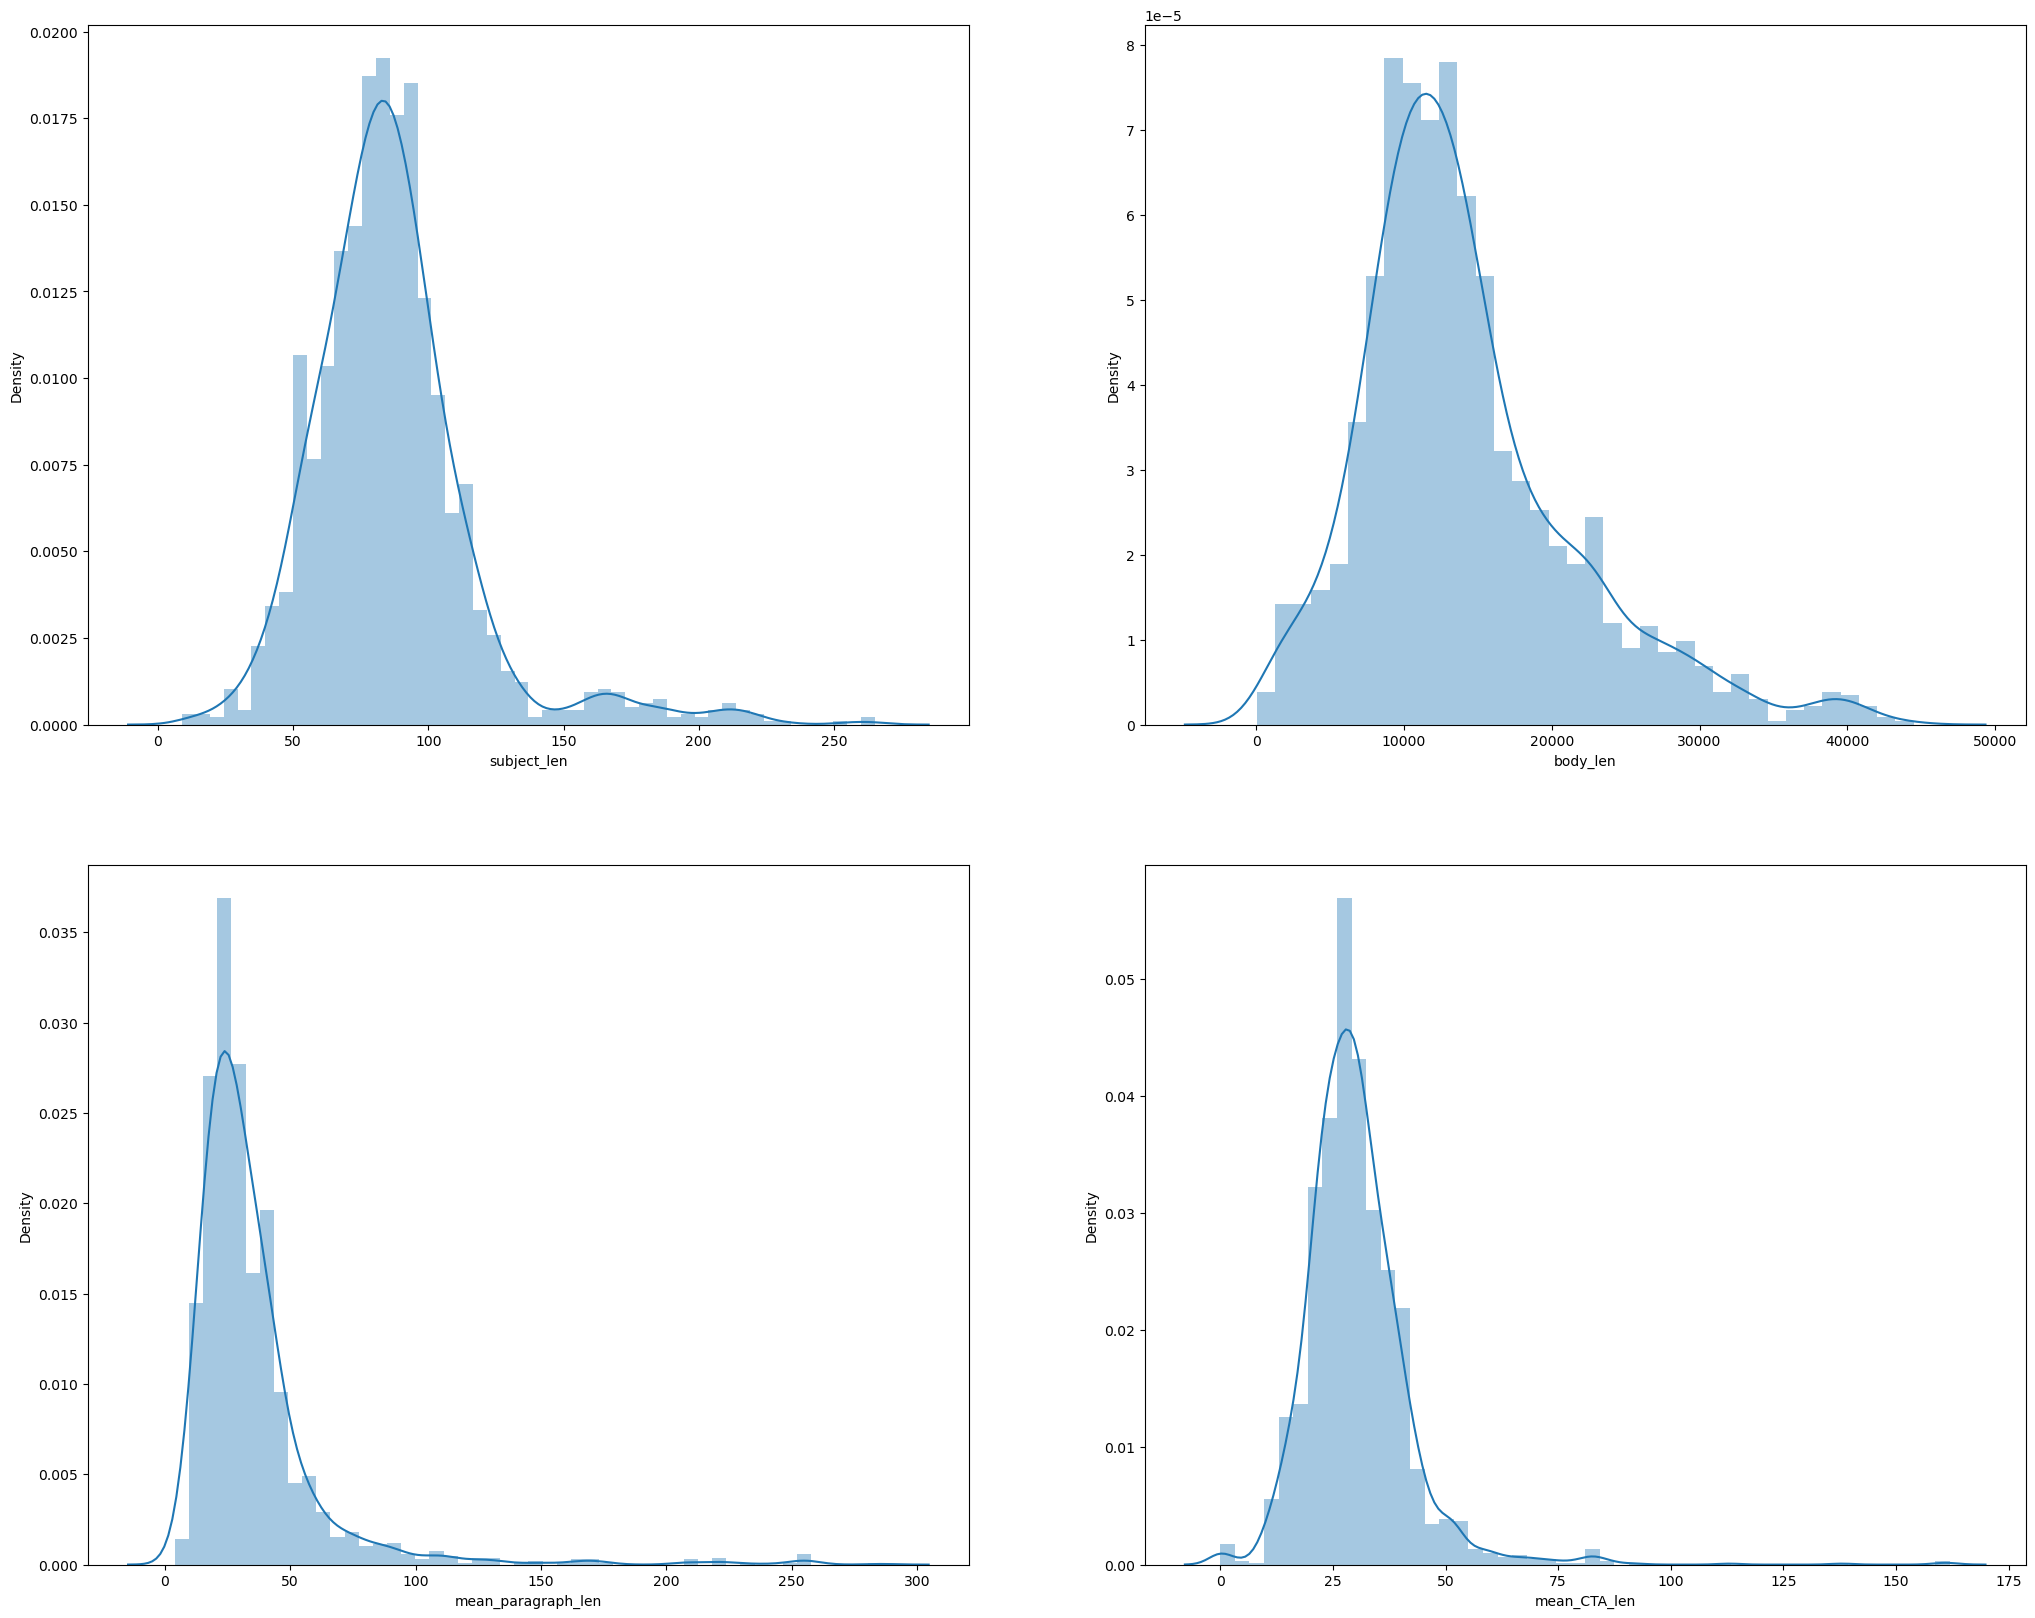

In [59]:
num_cols = ['subject_len','body_len','mean_paragraph_len','mean_CTA_len']

_, ax1 = plt.subplots(2,2, figsize=(25,20))
for i, col in enumerate(num_cols):
    sns.distplot(df_ctr[col], ax=ax1[i//2, i%2])
    
plt.show()

Что мы видим на графиках?  
Данные нормально распределены на всех графиках, при этом есть четкие максимальные значения

## Корреляции

Теперь посмотрим, какие корреляции есть между целевой переменной CTR и остальными переменными  
Для этого построим 

In [60]:
df_ctr.drop(columns=['campaign_id'],inplace=True) #избавимся от лишней колонки

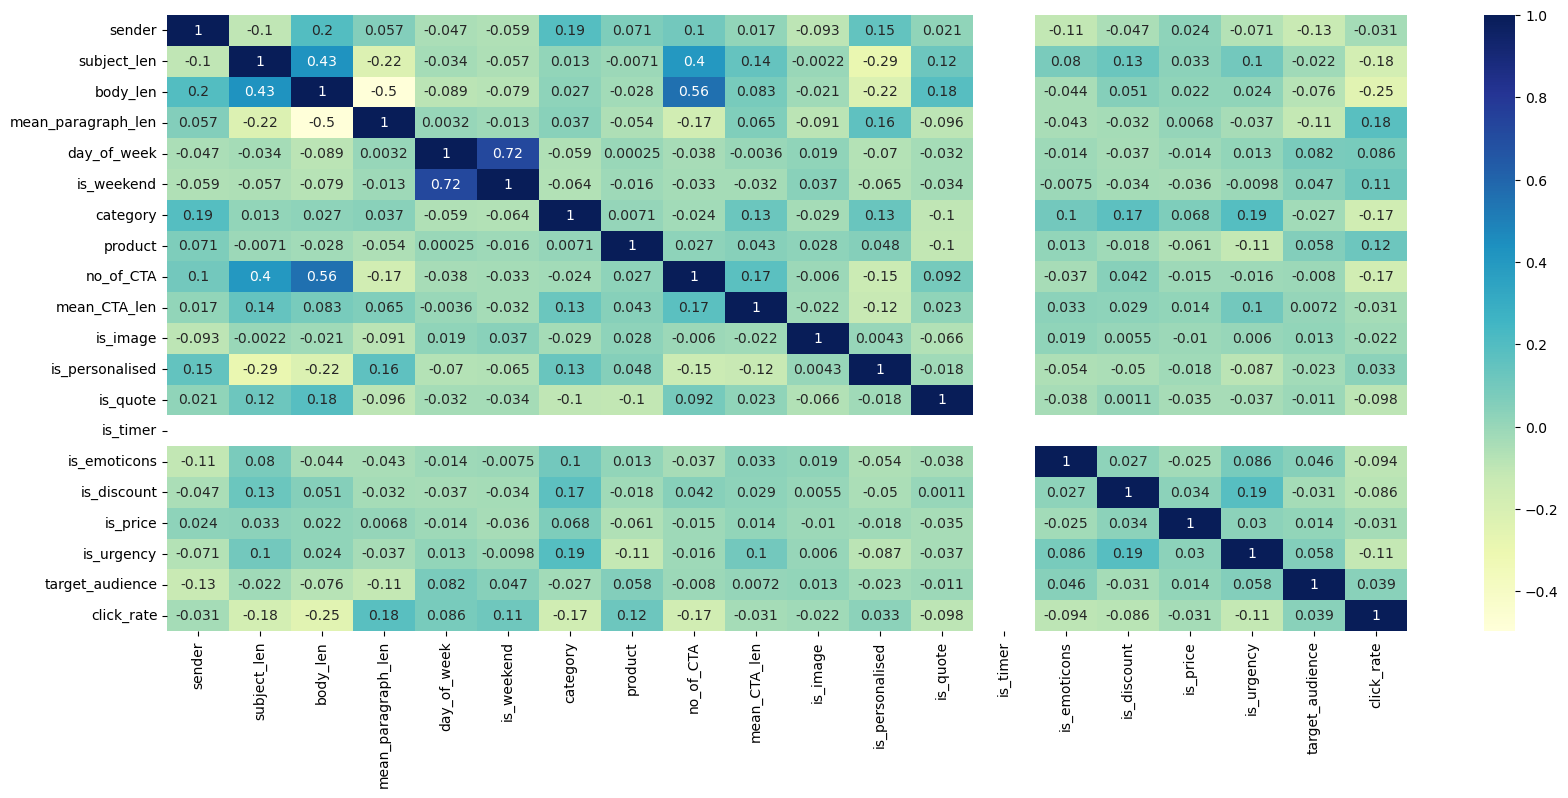

In [61]:
corr = df_ctr.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Видим позитивную корреляцию click_rate с переменными: 'mean_paragraph_len' (средняя длина параграфа) и переменная, которая указывает на выходной день выхода рассылки.  

Также видим сильные позитивные корреляции между следующими переменными:  
* Наличие CTA и длина тела письма. 
* Длина названия и длина тела письма  


In [62]:
df_ctr['click_rate'].max() #узнаем максимальное значение целевой переменной

0.8979591836734694

In [63]:
df_ctr['click_rate'].min() #узнаем минимальное значение целевой переменной

0.0

<AxesSubplot:>

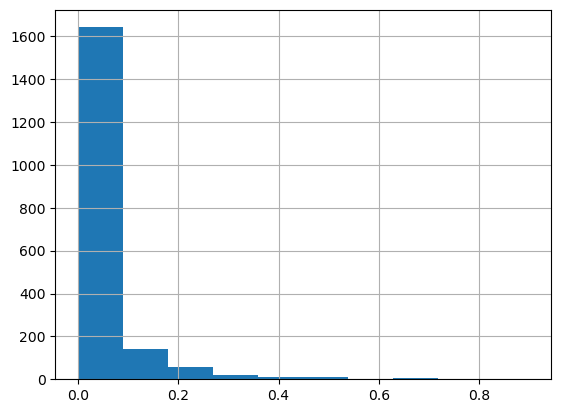

In [64]:
df_ctr['click_rate'].hist() #рассмотрим гистограмму

In [65]:
df_ctr1 = df_ctr[df_ctr['click_rate'] > 0.1] #исключим нулевые значения

<AxesSubplot:>

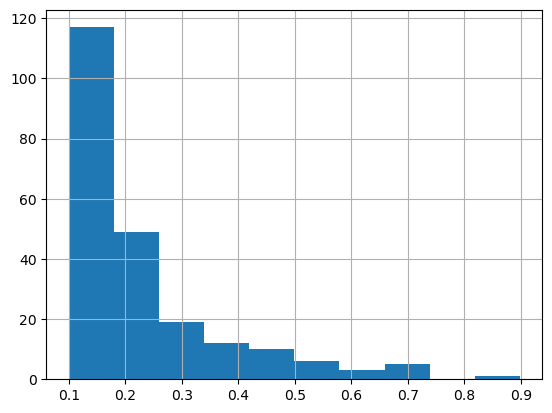

In [66]:
df_ctr1['click_rate'].hist()

In [67]:
def get_ctr_cat(click_rate): 
    if click_rate <=0.4:
        return "Низкий ctr"
    elif click_rate <=0.9:
        return "Высокий ctr"
    else: 
        return click_rate
    #Разобьем на категории отталкиваясь от разброса данных, видных на гистограмме. 

In [68]:
df_ctr1['click_rate_cat'] = df_ctr1['click_rate'].apply(get_ctr_cat) #присвоим переменную

In [69]:
df_ctr1 #проверим данные

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_cat
0,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,14,0.103079,Низкий ctr
1,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,10,0.700000,Высокий ctr
4,3,80,10011,27,5,1,Noon,6,26,3,...,0,1,0,0,0,0,0,14,0.142826,Низкий ctr
5,3,54,2569,256,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.500000,Высокий ctr
6,3,54,2570,256,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.457143,Высокий ctr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,3,51,1824,142,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,10,0.354545,Низкий ctr
1877,3,54,2565,255,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.131313,Низкий ctr
1878,3,88,1451,75,4,0,Noon,2,11,0,...,0,1,0,0,0,0,0,10,0.201923,Низкий ctr
1880,3,88,1451,75,4,0,Morning,2,11,0,...,0,1,0,0,0,0,0,10,0.169014,Низкий ctr


In [70]:
df_ctr1['click_rate_cat'].value_counts(ascending=True) 
#узнаем соотношение

Высокий ctr     27
Низкий ctr     195
Name: click_rate_cat, dtype: int64

In [71]:
df_click_rate_cat = df_ctr1['click_rate_cat'].value_counts(ascending=True) 
#сохраним датафрейм для визуализации

<AxesSubplot:title={'center':'CTR'}>

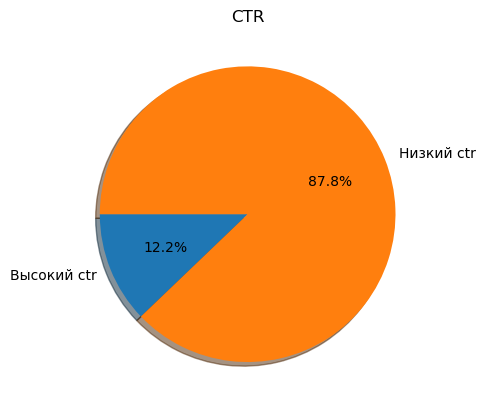

In [72]:
df_click_rate_cat.plot(kind = 'pie', ylabel='', title = 'CTR', autopct = '%.1f%%', 
    startangle = 180, shadow = True, textprops = {'color': 'black'})

На пайчарте видим, что писем с высоким CTR меньшинство, всего 12%

## Гипотезы

Чтобы проверить гипотезы с целевой переменной CTR, видоизменим новую категориальную переменную с помощью новой функции

In [73]:
df_ctr1['click_rate_cat'] = df_ctr1['click_rate_cat'].apply(lambda x: 1 if x == 'Высокий ctr' else 0)


In [74]:
df_ctr1

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,click_rate_cat
0,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,14,0.103079,0
1,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,10,0.700000,1
4,3,80,10011,27,5,1,Noon,6,26,3,...,0,1,0,0,0,0,0,14,0.142826,0
5,3,54,2569,256,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.500000,1
6,3,54,2570,256,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.457143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,3,51,1824,142,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,10,0.354545,0
1877,3,54,2565,255,4,0,Evening,2,11,0,...,0,0,0,0,0,0,0,10,0.131313,0
1878,3,88,1451,75,4,0,Noon,2,11,0,...,0,1,0,0,0,0,0,10,0.201923,0
1880,3,88,1451,75,4,0,Morning,2,11,0,...,0,1,0,0,0,0,0,10,0.169014,0


In [88]:
df_ctr1['is_emoticons'] = df_ctr1['is_emoticons'].apply(lambda x : 0 if x==0 else 1)
#преобразуем переменную is_emoticons с помощью функции

In [89]:
df_ctr1['is_emoticons'].value_counts() #проверяем

0    213
1      9
Name: is_emoticons, dtype: int64

Проверим гипотезы вокруг целевой переменной и выходным днем отправки  
**Предположим, что на кликабельность письма вылияет, было оно отправлено в выходной день или в будний.**  
* H0: Не существует зависимости между CTR и выходным днем отправки
* H1: Существует стат. значимая зависимость между CTR и выходным днем отправки

In [75]:
ct_o = df_ctr1.groupby('click_rate_cat')['is_weekend'].value_counts().unstack()
ct_o
#создаем таблицу сопряженности

is_weekend,0,1
click_rate_cat,,
0,137,58
1,18,9


In [76]:
chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(ct_o, correction = False)

output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(0.95, dof)
print ('critical value = ', critical_value)

if chi_2 >= critical_value:   #Проверяем H0
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

chi_2: 0.14503462834709824
degrees of freedom: 1
p-value: 0.7033263382386374

critical value =  3.841458820694124
Не отвергаем Н0


In [77]:
scipy.stats.chi2_contingency(ct_o, correction = False) #проверим значения

(0.14503462834709824,
 0.7033263382386374,
 1,
 array([[136.14864865,  58.85135135],
        [ 18.85135135,   8.14864865]]))

Делаем вывод, что не существует зависимости между CTR и выходным днем отправки

In [90]:
ct_o1 = df_ctr1.groupby('click_rate_cat')['is_emoticons'].value_counts().unstack()
ct_o1
#создаем таблицу сопряженности

is_emoticons,0,1
click_rate_cat,,
0,186.0,9.0
1,27.0,NaN


## Линейная регрессия

Вощьмем прогнозируемую переменную: CTR (click_rate), проверим зависимость со средней длиной призыва к действию. 
Используем библиотеку sklearn для алгоритма линейной регрессии
Но перед этим необходимо подготовить данные

In [78]:

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score , accuracy_score, f1_score

In [79]:
X = df_ctr1['click_rate']
y = df_ctr1['mean_CTA_len']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=21.611427719589678, intercept=22.461077772809485, rvalue=0.2523204236514537, pvalue=0.00014473467151342707, stderr=5.587727308958309, intercept_stderr=1.4747811568403324)


In [80]:
#Вычислим коэффициент детерминации:
r_sq = res.rvalue ** 2
print(r_sq)

0.06366559619164906


Видим, что коэфициент далек от 1, значит нет зависимости. проверим на графике

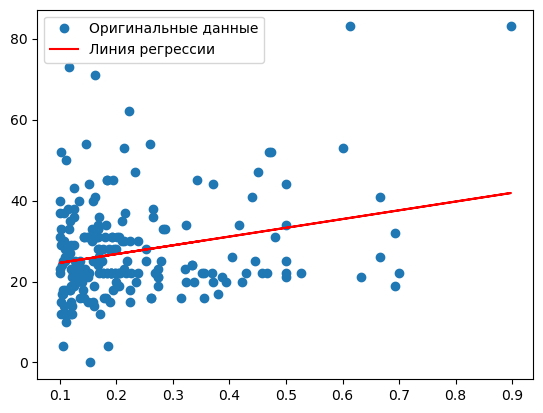

In [81]:
plt.plot(X, y, 'o', label='Оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='Линия регрессии')
plt.legend()
plt.show()

Наблюдаем не сильную зависимость

## Логистическая регрессия

Проверим, как различные переменные влияют на вероятность высокого CTR

Для этого используем модель логистической регрессии.   
Нормируем независимые переменные для лучшей интерпретации результатов.

In [82]:
a = 0.05

In [99]:
x = sm.add_constant(df_ctr1[['is_weekend','is_quote', 'day_of_week', 
                             'no_of_CTA', 'is_emoticons', 'body_len']])
y = df_ctr1['click_rate_cat']

logr = sm.Logit(y, x)
log_res = logr.fit()
print(log_res.summary())

         Current function value: 0.276449
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         click_rate_cat   No. Observations:                  222
Model:                          Logit   Df Residuals:                      215
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Dec 2022   Pseudo R-squ.:                  0.2531
Time:                        00:52:00   Log-Likelihood:                -61.372
converged:                      False   LL-Null:                       -82.172
Covariance Type:            nonrobust   LLR p-value:                 2.205e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4459      0.678      0.658      0.511      -0.883       1.775
is_weekend       0.8111      0.810      1.002      0.316   

Замечаем, что p-value меньше 0,05 в значении no_of_CTA и body_len, значит эти перменные важны

Попробуем натренировать модель

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=10)

In [101]:
Log_reg_model = LogisticRegression(penalty = 'l2', class_weight = 'balanced') 
# при прогонке без балансировки классов не было обнаружено предсказанных значений = 1, что делает модель фактически бесполезной
Log_reg_model.fit(x_train, y_train) #тренируем модель
y_pred = Log_reg_model.predict(x_test)
accuracy_score(y_test, y_pred)

#посмотрим метрики качества модели
print('Accuracy :', accuracy_score(y_test, y_pred))  
print('F1_score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))  

Accuracy : 0.7777777777777778
F1_score:  0.16666666666666666
Precision:  0.125
Recall:  0.25


Исходя из полученных результатов замечаем низкие метрики качества модели, что говорит о том, что лог. регрессия не обладает достаточной предсказательной силой.   

## Выводы

Мы проанализировали данные, проверили гипотезы и ответили на поставленные вопросы  
* **Когда отправляют больше всего писем?**  
Большинство писем отправляют в четверг, среду и пятницу.
Большинство писем отправляют не в выходные.
Большинство писем отправляют вечером
* **Когда отправляют больше всего писем с высоким CTR?**   
Утром и днем
* **Влияет ли средняя длина призыва к действию на CTR?**. 
Нет сильной зависимости
* **Каких писем больше: с высоким CTR или низким?**. 
Больше писем с низкой кликабельностью
* **Влияет ли день отправки на CTR?**. 
Нет стат.значимости между тем, в выходной отправлялась рассылка или в будний день. 


## Спасибо за внимание!